In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
plt.rcParams['figure.facecolor'] = 'white'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/brettnaul/miniconda3/envs/deep/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [42]:
from keras import backend as K
import sample_data
%run autoencoder.py 64 2 0 --no_train --uneven --model_type conv --batch_norm --filter_length 7 --decode_type gru --sigma 0.0 --lr 5e-4 --sim_type autoencoder/uneven_t100/noise0.0 --nb_epoch 0 --embedding 64
Y = sample_data.phase_to_sin_cos(Y)
train = np.arange(args.N_train)
test = args.N_train + np.arange(args.N_test)

Skipping PhasedLSTM...
[]
/Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/autoencoder/uneven_t100/noise0.0/conv_064_x2_5m04_drop0_bn_f7_emb64_decodegru
Loading /Users/brettnaul/Dropbox/Documents/timeflow/keras_logs/autoencoder/uneven_t100/noise0.0/conv_064_x2_5m04_drop0_bn_f7_emb64_decodegru/weights.h5...


# Visualizing predictions

In [43]:
%%time
pred = model.predict({'main_input': X, 'aux_input': X[:, :, [0,]]}, batch_size=500)

CPU times: user 4min 35s, sys: 1min 15s, total: 5min 50s
Wall time: 1min 5s


In [44]:
model.evaluate({'main_input': X, 'aux_input': X[:, :, [0,]]}, X[:, :, [1]], batch_size=500)

51000/51000 [==============================] - 70s     s 1000/51000 [..............................] - ETA: 86s 

0.077187768932358888

In [45]:
train = np.arange(args.N_train); test = args.N_train + np.arange(args.N_test)
i = train[0] - 1

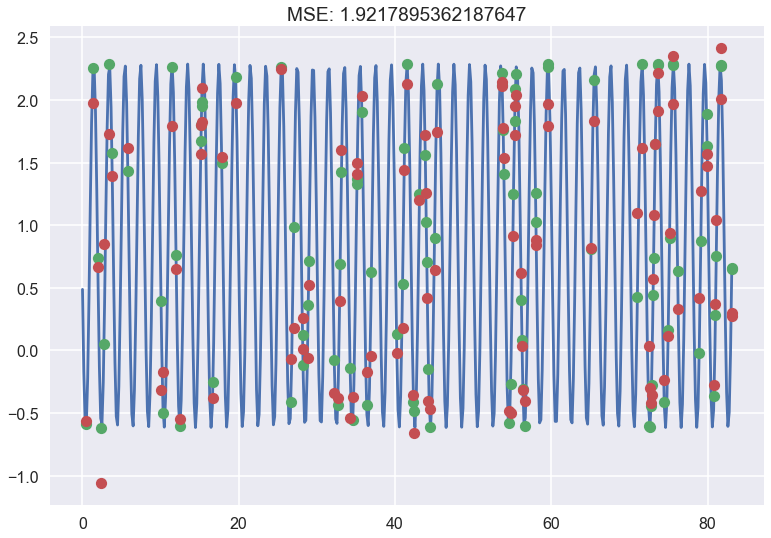

In [46]:
i += 1
if args.even:
    t = np.linspace(0, 2 * np.pi, X.shape[1])
    m = X[i, :, 0]
else:
    inds = (X[i, :, 0] >= 0.)
    t = X_raw[i, inds, 0]
    m_raw = X_raw[i, inds, 1]
    m = X[i, inds, 1]

T = np.linspace(0, t.max(), 501)
def sinusoid(p, A1, A2, b):
    return lambda t: A1 * np.cos(2 * np.pi / p * t) + A2 * np.sin(2 * np.pi / p * t) + b

plt.plot(T, sinusoid(*Y[i])(T))
plt.plot(t, m, 'o')
plt.plot(t, pred[i], 'o')

plt.title("MSE: {}".format(np.mean((m_raw - pred[i]) ** 2)));

# Visualizing training progress